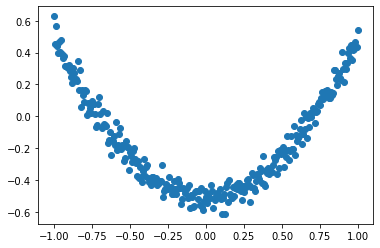

0.55679363
0.008985407
0.005297572
0.004077197
0.0034943104
0.003184702
0.0030178733
0.002912694
0.0028375916
0.0027844976
0.002741804
0.002709376
0.0026864363
0.0026707433
0.0026575846
0.0026462593
0.0026365821
0.0026276377
0.0026198344
0.0026128567


In [5]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs,in_size,out_size,activation_function=None): #定义添加神经层的函数def add_layer(),它有四个参数：输入值、输入的大小、输出的大小和激励函数，我们设定默认的激励函数是None。
    # 因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    # 机器学习中推荐biases不为0，所以加个0.1
    biases = tf.Variable(tf.zeros([1,out_size])+ 0.1)
    # 定义Wx_plus_b, 即神经网络未激活的值。其中，tf.matmul()是矩阵的乘法。
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # 当activation_function——激励函数为None时，输出就是当前的预测值——Wx_plus_b，
    # 不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)

    return outputs

# 虚构一个所需的数据
# 这里的x_data和y_data并不是严格的一元二次函数的关系，
# 因为我们多加了一个noise,这样看起来会更像真实情况。
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise # y=x^2 -0.5

# 利用占位符定义我们所需的神经网络的输入。 tf.placeholder()就是代表占位符，
# 这里的None代表无论输入有多少都可以，因为输入只有一个特征，所以这里是1。
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# 建立2个隐藏层，输入层只有一个特征，建立2个隐藏层,每层10个神经元，输出也是一个特征，激励函数用的tf.nn.relu，tf.nn.tanh.激励函数有很多比如tf.nn.sigmoid
l1 = add_layer(xs, 1, 10,activation_function=tf.nn.relu)
l2 = add_layer(l1, 10, 10,activation_function=tf.nn.tanh)

prediction = add_layer(l2,10,1,activation_function=None) # 输出特征

# 损失函数
# 计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1])) #reduction_indices参数的值为1的时候，是第1维对应位置相加

# 练习
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #训练，采用梯度下降法，学习率为0.1优化的步长取值，学习方向减小loss

# 初始化变量
init = tf.global_variables_initializer()

# 上面所有的都还没有运行
# 定义Session，并用 Session 来执行 init 初始化步骤。
# （注意：在tensorflow中，只有session.run()才会执行我们定义的运算。）
sess = tf.Session()
sess.run(init) # 这里运行了init

#可视化
# Pycharm可以在【Settings】-->【Python Scientific】-->取消“Show plots……”的勾
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion() # 使图像可动态
plt.show()

# 这里，我们让机器学习1000次。机器学习的内容是train_step,
# 用 Session 来 run 每一次 training 的数据，逐步提升神经网络的预测准确性。
# (注意：当运算要用到placeholder时，就需要feed_dict这个字典来指定输入。)
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    # 每50步我们输出一下机器学习的误差。
    # 每隔50次训练刷新一次图形，用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s。
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data, ys:y_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)

plt.pause(0) # 完成运行后图片不消失